In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

In [2]:
df = pd.read_csv('Dataset//diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


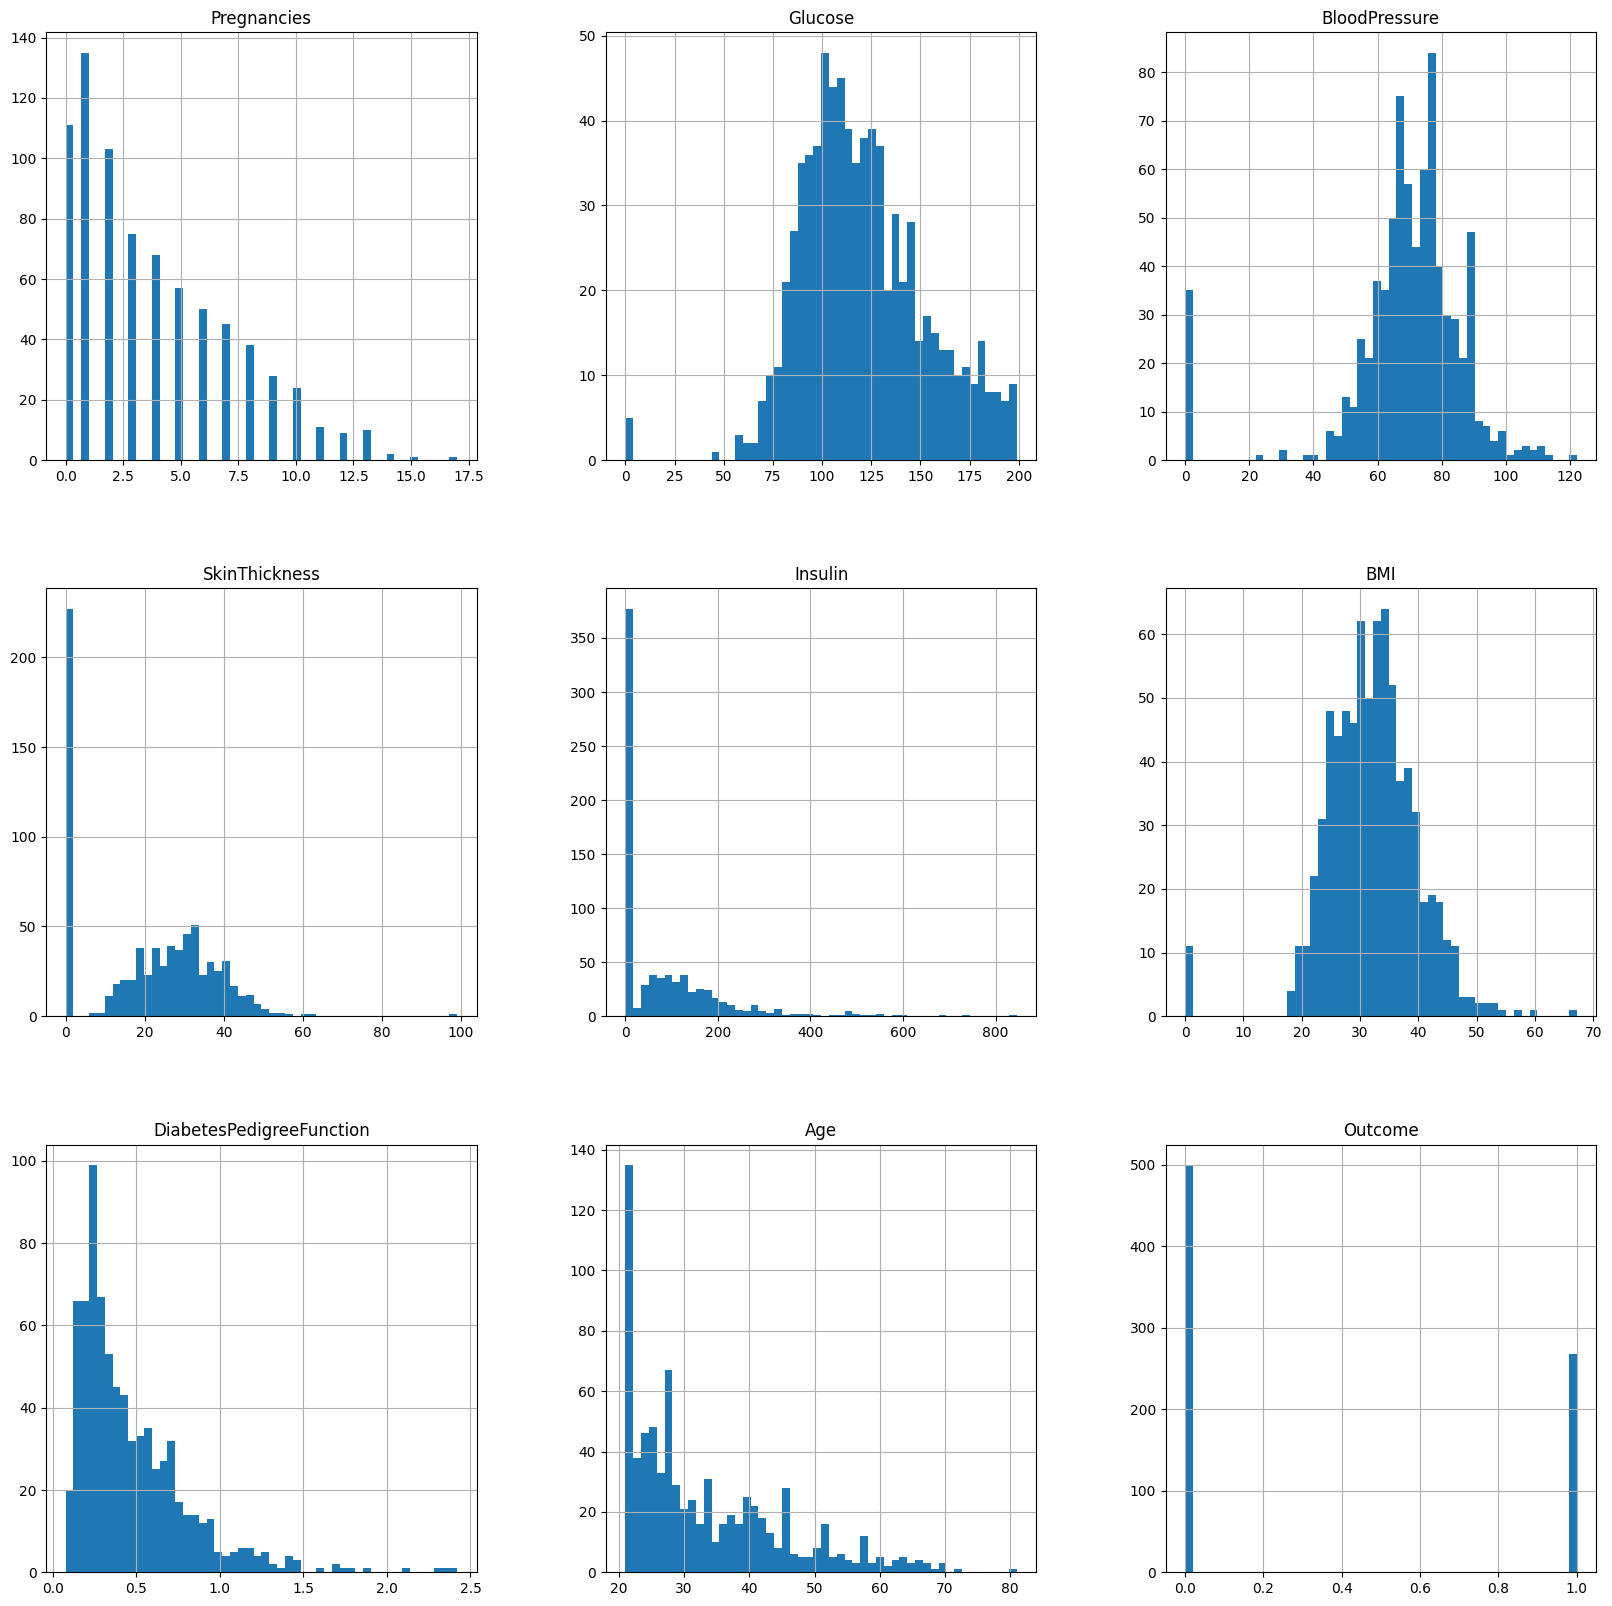

In [5]:

df.hist(bins=50, figsize=(20, 20))
plt.show()

### Individual bar plots

<AxesSubplot:xlabel='Outcome', ylabel='count'>

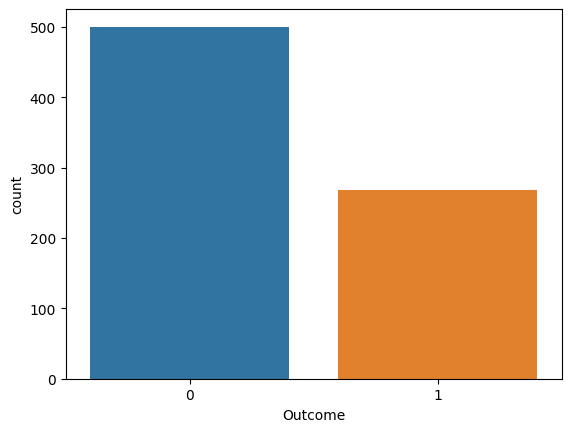

In [6]:
# bar plot of the number of patients with diabetes and without diabetes
sns.countplot(x='Outcome', data=df)

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Stratified sampling on output feature

In [8]:
#Stratified sampling on output feature
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

### One hot encoding for categorical features 

In [9]:
# type of features in the dataset
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

##### Encoding the Categorical values into numerical values is not required in this dataset. Because all values we have floating type only. we have name column as a categorical values but we are not going to use that column in model prediction.

##### So no need to apply label encoding...

###  Normalization / Standardization for numerical features

In [10]:
# Normalization
df['Pregnancies'] = (df['Pregnancies'] - df['Pregnancies'].min()) / (df['Pregnancies'].max() - df['Pregnancies'].min())
df['Glucose'] = (df['Glucose'] - df['Glucose'].min()) / (df['Glucose'].max() - df['Glucose'].min())
df['BloodPressure'] = (df['BloodPressure'] - df['BloodPressure'].min()) / (df['BloodPressure'].max() - df['BloodPressure'].min())
df['SkinThickness'] = (df['SkinThickness'] - df['SkinThickness'].min()) / (df['SkinThickness'].max() - df['SkinThickness'].min())
df['Insulin'] = (df['Insulin'] - df['Insulin'].min()) / (df['Insulin'].max() - df['Insulin'].min())
df['BMI'] = (df['BMI'] - df['BMI'].min()) / (df['BMI'].max() - df['BMI'].min())

In [11]:
# Standardization MDVP:Fo(Hz),MDVP:Fhi(Hz)MD,VP:Flo(Hz) using sklearn


### Co relation matrix

In [12]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


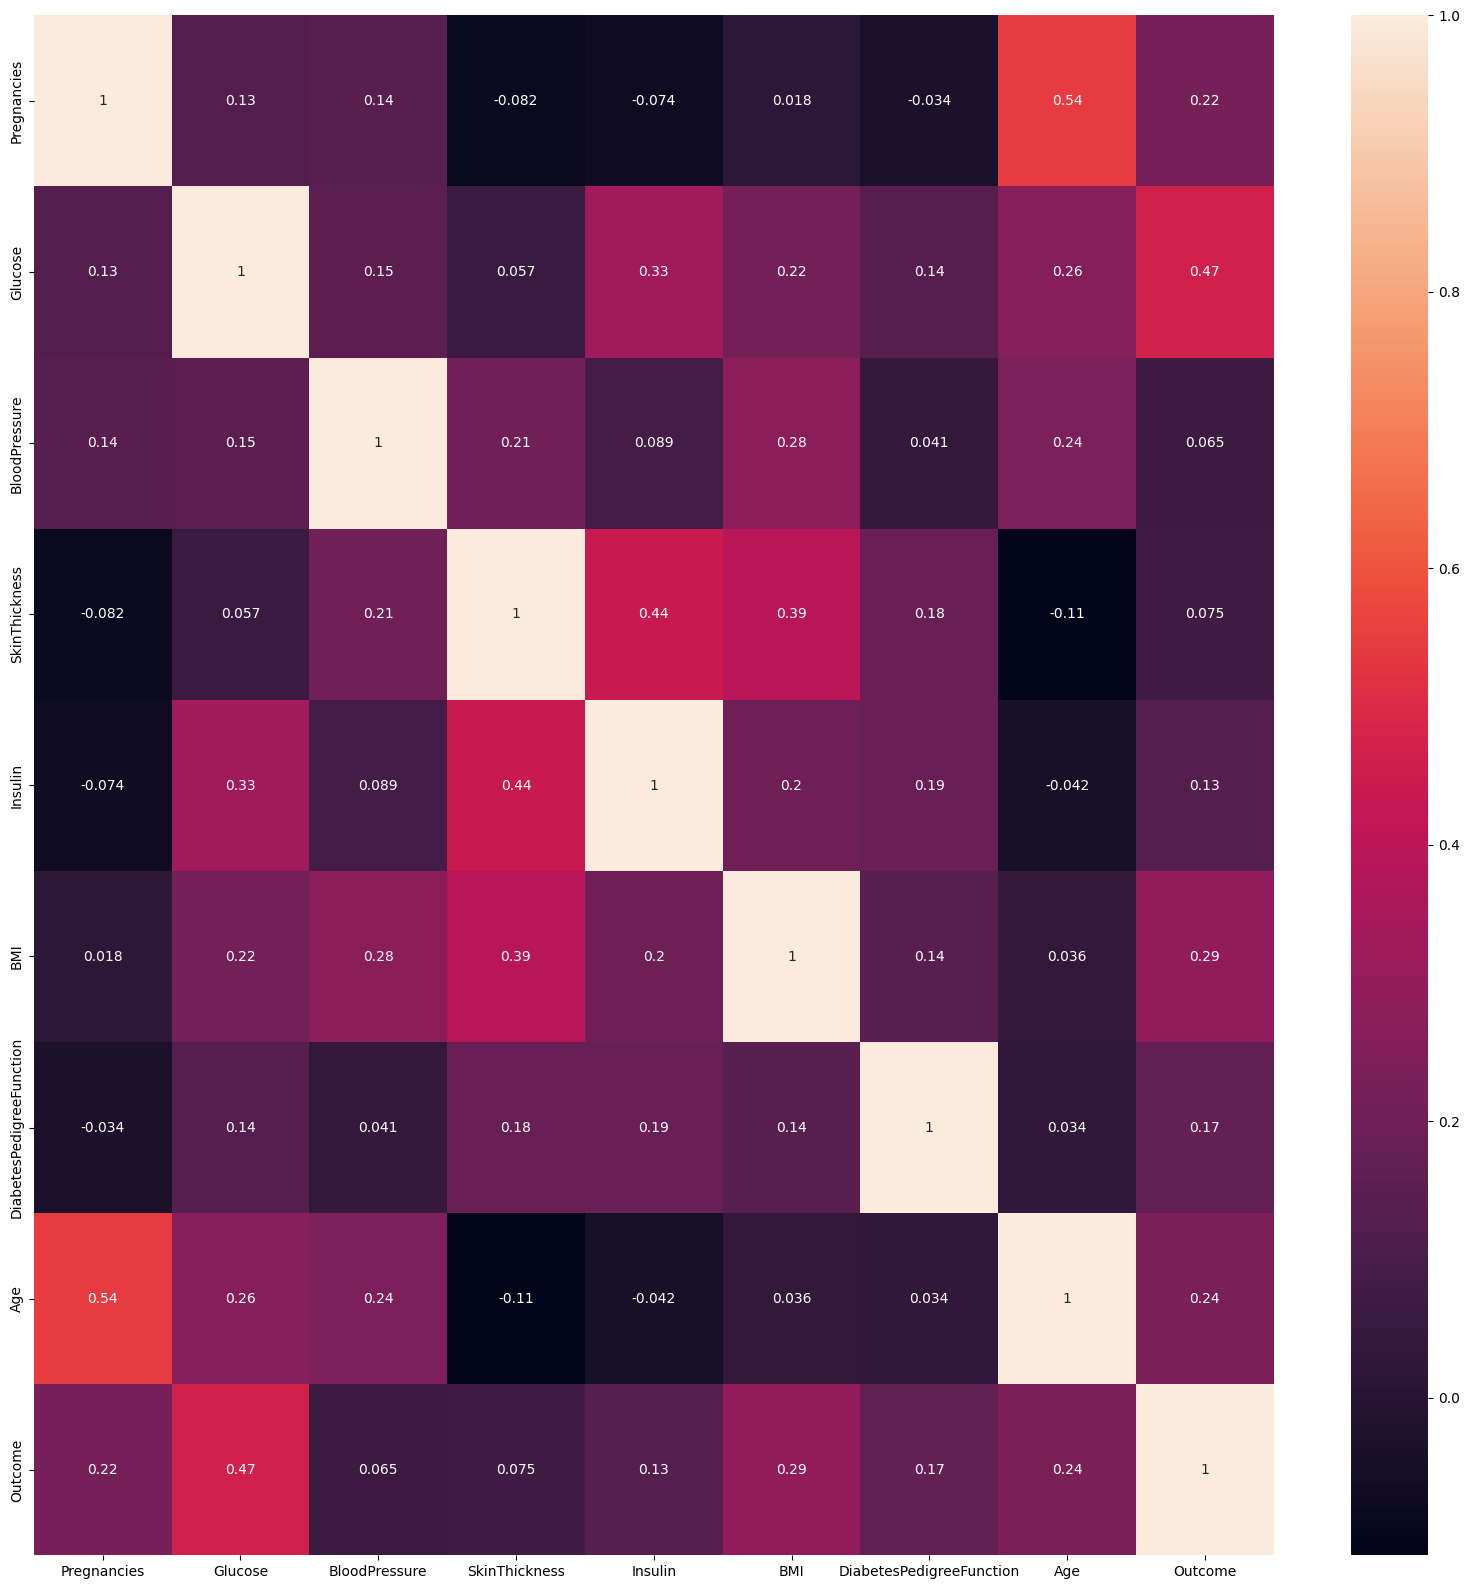

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()

In [14]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Count the number of samples in each class
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [16]:
# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df, df['Outcome'])
X_res.shape, y_res.shape

((1000, 9), (1000,))

In [17]:
# Under sampling
from typing import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(df, df['Outcome'])
print(sorted(Counter(y_resampled).items()))

[(0, 268), (1, 268)]


In [18]:
# Data Balance
df = pd.DataFrame(X_resampled, columns=df.columns)
df['Outcome'] = y_resampled
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.117647,0.542714,0.426230,0.262626,0.074468,0.484352,0.318,22,0
1,0.058824,0.718593,0.688525,0.232323,0.366430,0.631893,1.076,22,0
2,0.294118,0.432161,0.557377,0.282828,0.083924,0.450075,0.364,24,0
3,0.117647,0.507538,0.475410,0.171717,0.313239,0.360656,0.614,23,0
4,0.235294,0.552764,0.622951,0.202020,0.118203,0.423249,0.118,27,0


In [19]:
# Print Balanced Data
df['Outcome'].value_counts()


0    268
1    268
Name: Outcome, dtype: int64

In [20]:
# traing and testing split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# SVM model
model = svm.SVC(kernel='linear', C=1, gamma=1)
 

In [22]:
#K-fold cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=100, scoring='accuracy')
print("KNN_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

svm = SVC(kernel='linear', C=1, random_state=0)
scores = cross_val_score(svm, X, y, cv=100, scoring='accuracy')
print("SVM_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
scores = cross_val_score(tree, X, y, cv=100, scoring='accuracy')
print("DecisionTree_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

logireg = LogisticRegression(C=1.0, random_state=0)
scores = cross_val_score(logireg, X, y, cv=100, scoring='accuracy')
print("LogisticRegression_Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))




NameError: name 'KNeighborsClassifier' is not defined